# Loading Data

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for pandas
pd.set_option('display.max_columns', None)

# Load the dataset
filepath = 'data/raw/insurance_claims_above_point.csv'

df = pd.read_csv(filepath)
df_copy = df.copy()

# Display the first few rows of the copied DataFrame
df_copy.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_split,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,year,month,day,day_of_week,is_weekend
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2015,1,25,6,1
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2015,2,22,6,1
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,2015,1,10,5,1
3,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,2015,1,2,4,0
4,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,2015,1,13,1,0


# Data Quality Assessment

### Variable Type 

In [2]:
# Numerical features
num_cols = [
    'months_as_customer',
    'age',
    'policy_deductable',
    'policy_annual_premium',
    'umbrella_limit',
    'capital-gains',
    'capital-loss',
    'total_claim_amount',
    'injury_claim',
    'property_claim',
    'vehicle_claim'
]

# Discrete numerical features
discrete_num_cols = [
    'number_of_vehicles_involved',
    'bodily_injuries',
    'witnesses'
]

# Define categorical features
cat_cols = [
    'policy_number',
    'policy_state',
    'policy_split',
    'insured_zip',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'insured_hobbies',
    'insured_relationship',
    'incident_type',
    'collision_type',
    'incident_severity',
    'authorities_contacted',
    'incident_state',
    'incident_city',
    'incident_location',
    'property_damage',
    'police_report_available',
    'auto_make',
    'auto_model',
    'fraud_reported'
]

# Define time series features
time_series_cols = [
    'policy_bind_date',
    'incident_date',
    'incident_hour_of_the_day',
    'auto_year'
]

# Verify that all columns are identified
for col in df_copy.columns:
    if col not in num_cols + discrete_num_cols + cat_cols + time_series_cols:
        print(f"Col {col} is missing.")

Col year is missing.
Col month is missing.
Col day is missing.
Col day_of_week is missing.
Col is_weekend is missing.


### Structural Quality

In [3]:
# Display the shape of the DataFrame
print(f"""Shape of the DataFrame:
No. of rows     : {df_copy.shape[0]:}
No. of columns  : {df_copy.shape[1]:>3}
{"="*70}""")

# Display missing values information
missing_value_df = pd.DataFrame({
    'missing_value_count': df_copy.isnull().sum(),
    'missing_value_pct': df_copy.isnull().mean() * 100
})
print(f"""Columns with missing values:
{missing_value_df[missing_value_df['missing_value_count'] > 0]}
{"="*70}""")

# Display duplicate rows information
print(f"No. of duplicate rows : {df_copy.duplicated().sum()}")
print("="*70)

Shape of the DataFrame:
No. of rows     : 822
No. of columns  :  44
Columns with missing values:
Empty DataFrame
Columns: [missing_value_count, missing_value_pct]
Index: []
No. of duplicate rows : 0


### Numeric Features

In [4]:
# Display summary statistics for numerical features
print("Summary statistics for numerical features:")
df_copy[num_cols].describe().astype(int)

Summary statistics for numerical features:


,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,822,822,822,822,822,822,822,822,822,822,822
mean,206,39,1137,1258,1052311,25558,-27042,63013,8879,8838,45296
std,116,9,613,245,2247410,27920,28336,16010,4147,4080,11331
min,0,19,500,484,-1000000,0,-111100,18000,0,0,12720
25%,118,32,500,1090,0,0,-52450,52312,5782,5852,37442
50%,202,38,1000,1260,0,400,-22350,62270,7700,7640,44800
75%,279,45,2000,1413,0,51375,0,74155,12140,11620,52612
max,479,64,2000,2047,10000000,100500,0,114920,21450,23670,79560


- Minimum value of `umbrella_limit` is -1000000, which is not plausible because it provides additional coverage.
- Therefore, it must be a non-negative value. This error must be due to the presence of a bug in data pipeline.
- **Recommended Action**: We have to transform values of the `umbrella_limit` into absolute values.

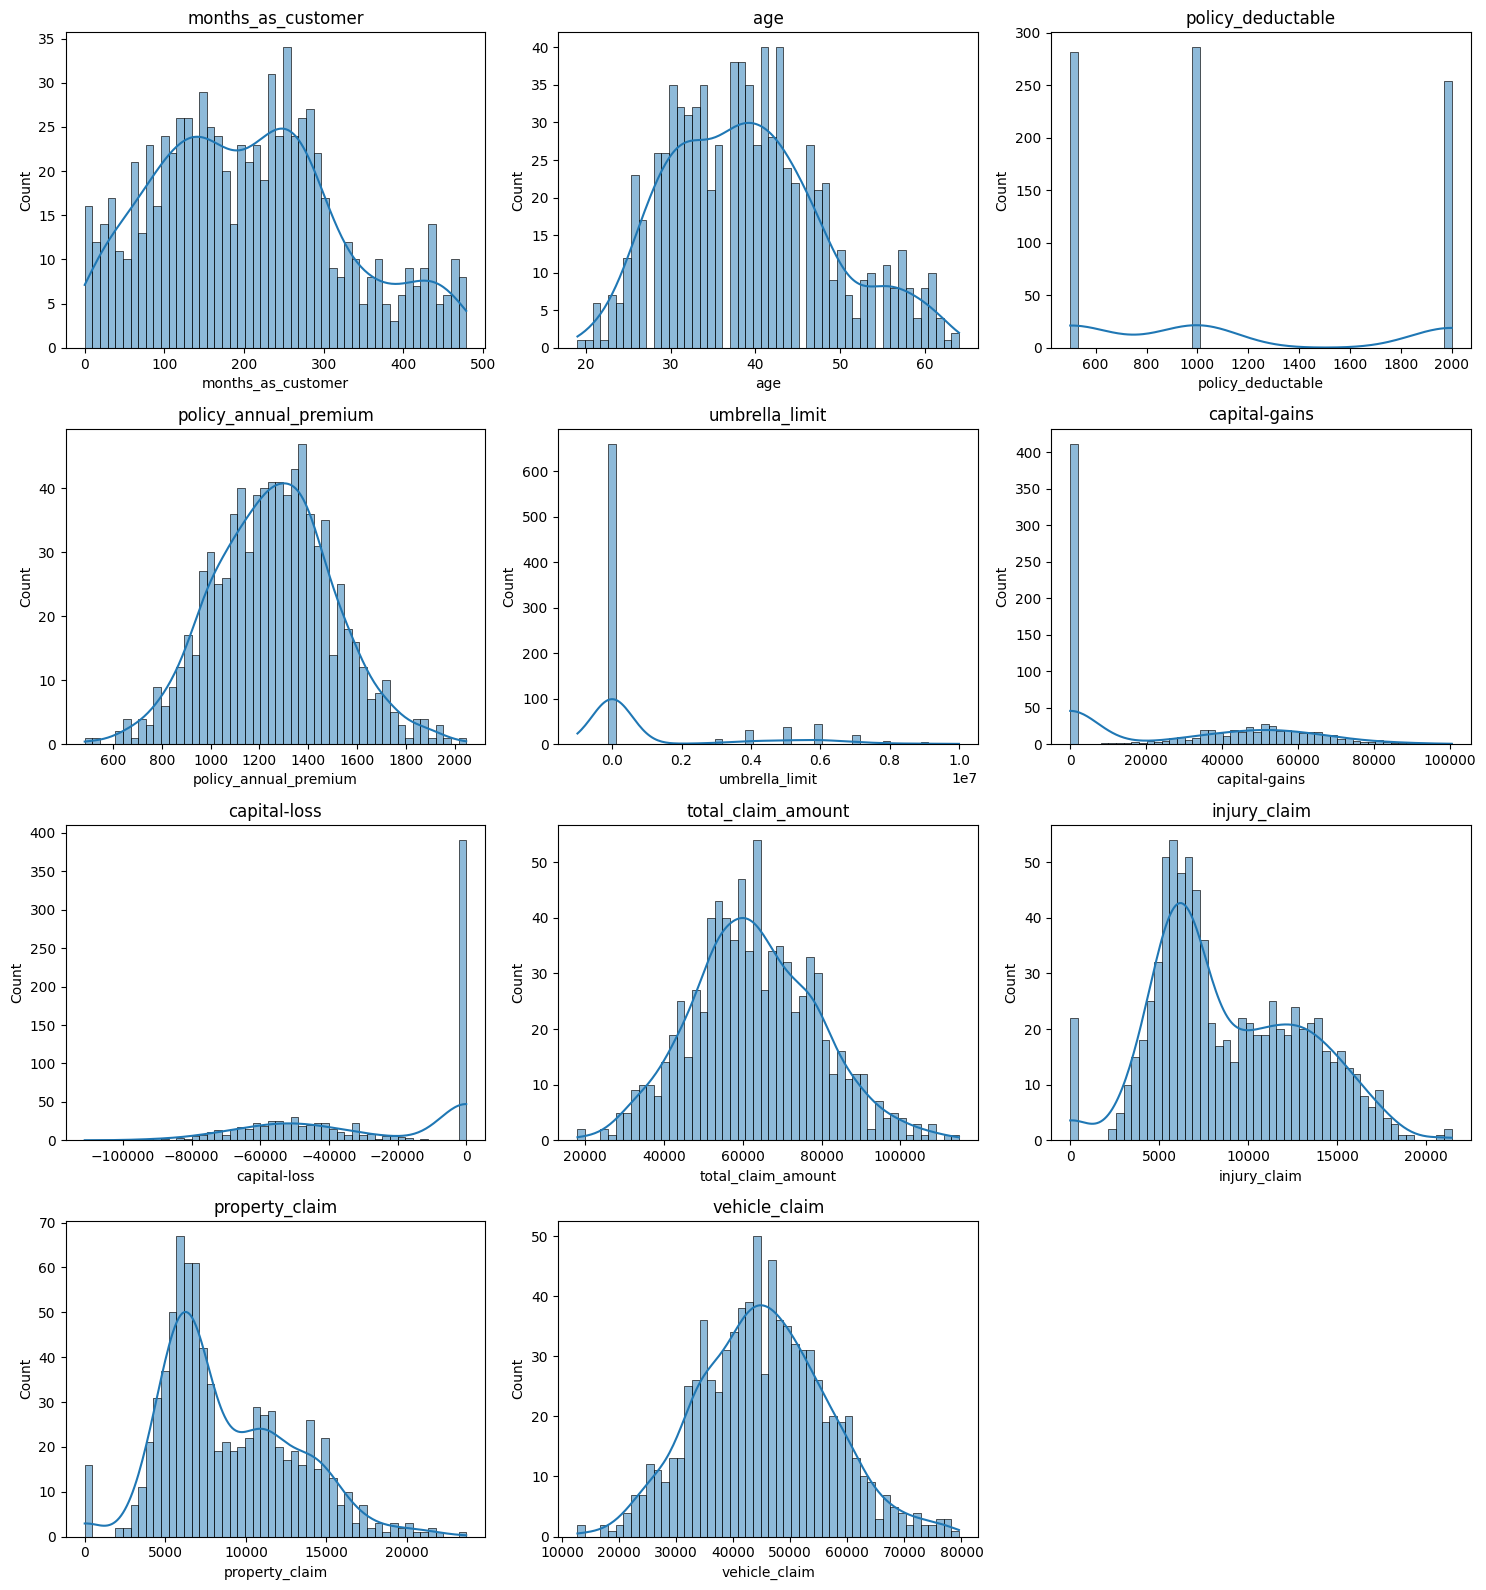

In [5]:
import math

n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(
        data=df_copy[col],
        kde=True,
        bins=50,
        ax=axes[i]
    )
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [6]:
# Hartigan’s Dip Test for Unimodality
# → H0: The distribution is unimodal
# → H1: The distribution is not unimodal (bimodal or multimodal)

from diptest import diptest

col_list = ['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']

for col in col_list:
    dip_value, p_value = diptest(df_copy[col])
    print(f"""Dip Test Results for {col}:
    Dip Statistic: {dip_value:.5}
    p-value: {p_value}""")

    if p_value < 0.05:
        print("→ Reject unimodality")
    else:
        print("→ Accept unimodality")
    print("="*40)

Dip Test Results for total_claim_amount:
    Dip Statistic: 0.0083637
    p-value: 0.9897631928742763
→ Accept unimodality
Dip Test Results for injury_claim:
    Dip Statistic: 0.013382
    p-value: 0.43514248662590016
→ Accept unimodality
Dip Test Results for property_claim:
    Dip Statistic: 0.01078
    p-value: 0.8104020488950275
→ Accept unimodality
Dip Test Results for vehicle_claim:
    Dip Statistic: 0.0079534
    p-value: 0.9916652762655477
→ Accept unimodality


### Discrete Features 

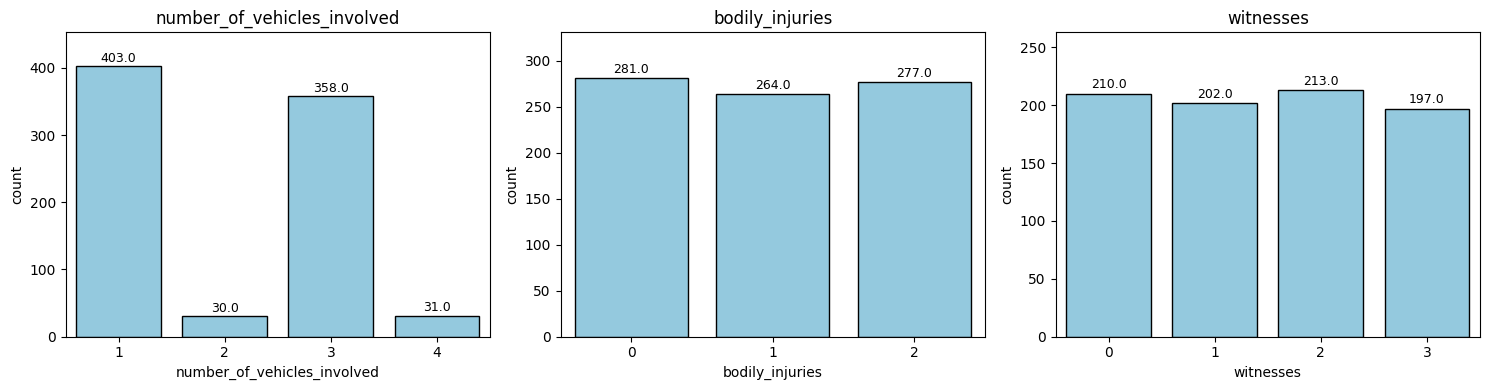

In [7]:
# Visualization of discrete numerical features

n_cols = 3
n_rows = math.ceil(len(discrete_num_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(discrete_num_cols):
    ax = axes[i]
    sns.countplot(
        data=df_copy,
        x=col,
        color='skyblue',
        edgecolor='black',
        ax=ax
    )
    counts = df_copy[col].value_counts()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height + 2),
                    ha='center', va='bottom', fontsize=9, color='black')
    ax.set_title(col)
    ax.set_ylim(0, counts.max() + 50)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

- `number_of_vehicles_involved` show clear and distinct patterns, where single vehicle accidents are highest.
- `bodily_injuries`and `witnesses` have uniform distribution.

### Categorical Features

#### Imbalance Detection

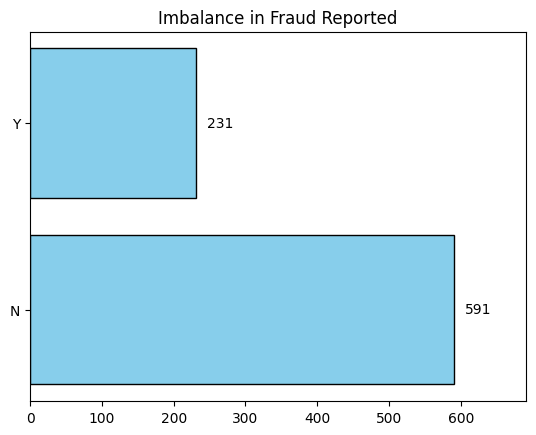

In [8]:
values = df_copy['fraud_reported'].value_counts().values
labels = df_copy['fraud_reported'].value_counts().index

bars = plt.barh(
    y=labels,
    width=values,
    color='skyblue',
    edgecolor='black'
)

for bar, value in zip(bars, values):
    plt.text(
        value + 15,  # Slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,
        str(value),
        va='center',
        fontsize=10,
        color='black'
    )
    plt.xlim(0, max(values) + 100)

plt.title('Imbalance in Fraud Reported')
plt.show()

#### Inconsistent Categories

In [9]:
cat_cols_copy = cat_cols.copy()
items_to_remove = [
    'policy_number', # unique identifier
    'insured_zip',   # high cardinality
    'incident_location', # high cardinality
    'insured_hobbies', # high cardinality
    'insured_occupation', # high cardinality
    'auto_model', # high cardinality
    'fraud_reported', # target variable
]

for item in items_to_remove: 
    while item in cat_cols_copy:
        cat_cols_copy.remove(item)

# Display unique values in categorial features
for col in cat_cols_copy:
    print(f"{col} : {df_copy[col].unique()}")

policy_state : ['OH' 'IL' 'IN']
policy_split : ['250/500' '100/300' '500/1000']
insured_sex : ['MALE' 'FEMALE']
insured_education_level : ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_relationship : ['husband' 'own-child' 'unmarried' 'wife' 'other-relative' 'not-in-family']
incident_type : ['Single Vehicle Collision' 'Multi-vehicle Collision']
collision_type : ['Side Collision' 'Rear Collision' 'Front Collision']
incident_severity : ['Major Damage' 'Minor Damage' 'Total Loss']
authorities_contacted : ['Police' 'Fire' 'Other' 'Ambulance']
incident_state : ['SC' 'NY' 'OH' 'VA' 'WV' 'NC' 'PA']
incident_city : ['Columbus' 'Arlington' 'Springfield' 'Hillsdale' 'Northbend' 'Riverwood'
 'Northbrook']
property_damage : ['YES' 'NO' '?']
police_report_available : ['YES' 'NO' '?']
auto_make : ['Saab' 'Dodge' 'Chevrolet' 'Nissan' 'Audi' 'Toyota' 'Ford' 'Accura'
 'Suburu' 'BMW' 'Mercedes' 'Jeep' 'Honda' 'Volkswagen']


- There are data inconsistency with “?”. We need to replace it with “NA” (Not Available)
- `policy_state`, `insured_sex`, `insured_relationship`, `collision_type`, `authorities_contacted`, `incident_state`, `incident_city`,`property_damage`, `police_report_available` and `auto_make` are Nominal Type, rest are ordinal.

#### Frequency Distribution

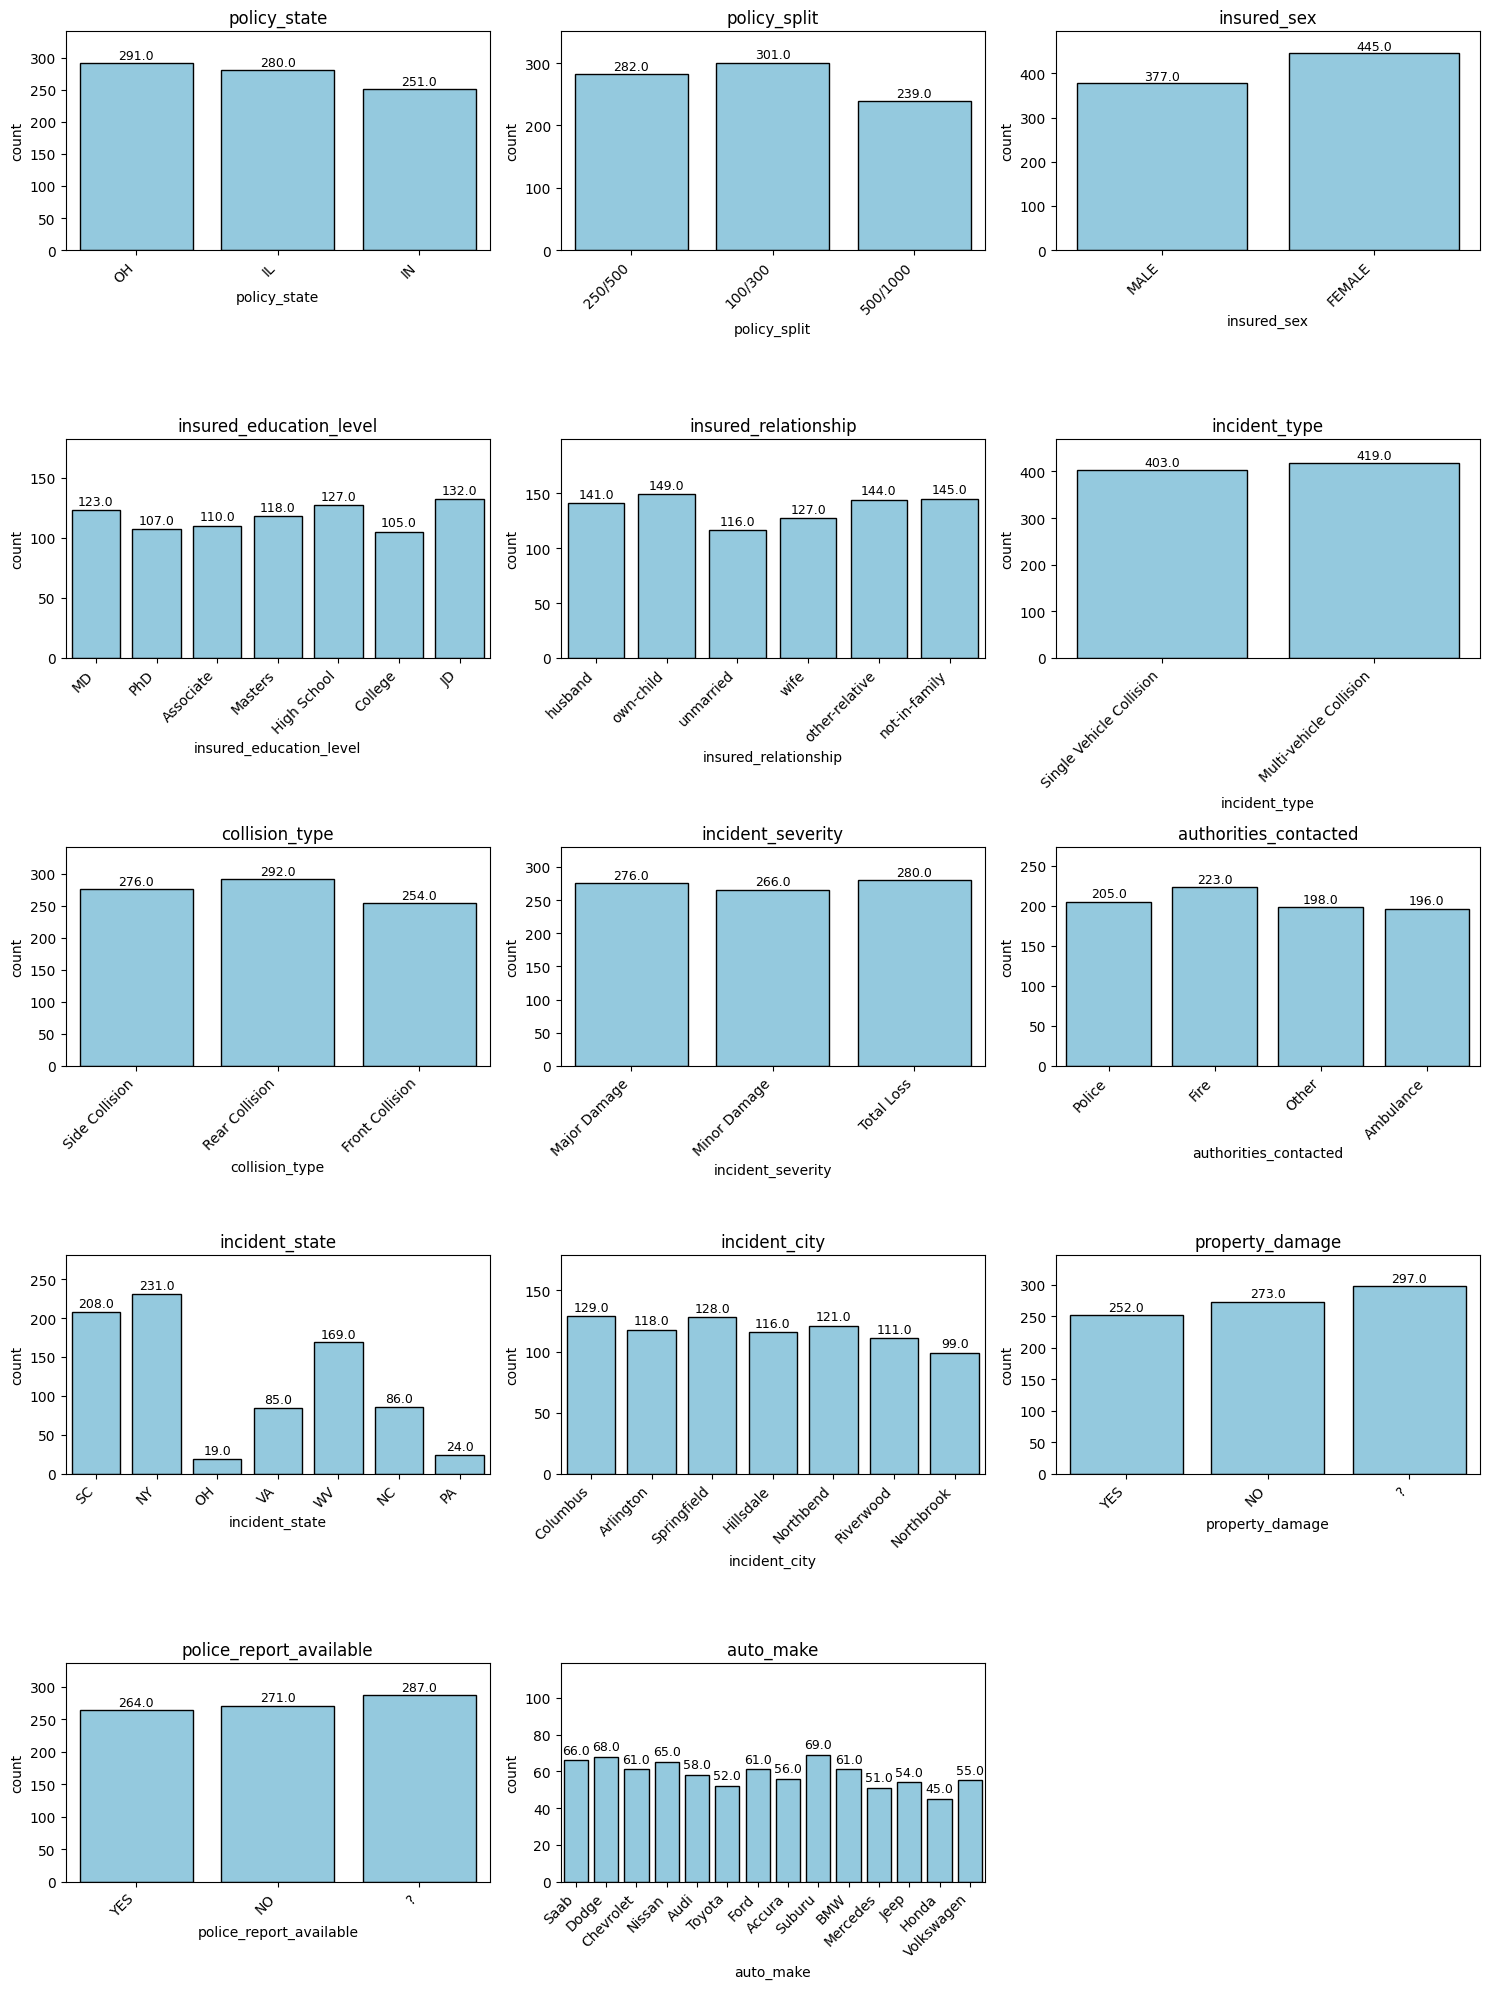

In [10]:
# Visualization of Frequency Distribution of low cardinality features
n_cols = 3
n_rows = math.ceil(len(cat_cols_copy) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols_copy):
    ax = axes[i]
    sns.countplot(
        data=df_copy,
        x=col,
        color='skyblue',
        edgecolor='black',
        ax=ax
    )

    counts = df_copy[col].value_counts()

    # Annotate bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height + 2),
                    ha='center', va='bottom', fontsize=9, color='black')

    ax.set_title(col)
    ax.set_ylim(0, counts.max() + 50)

    # ✅ Safe way to rotate tick labels (avoids UserWarning)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


- `incident_type`, `collision_type`, `incident_severity`, `authoriries_contacted` and `incident_state` have clear patterns while others are uniform

In [11]:
row_filter = df_copy.isin(["?"]).any(axis= 1)
col_filter = df_copy.isin(["?"]).any()
df_copy.loc[row_filter, col_filter]

,property_damage,police_report_available
2,?,NO
4,?,?
5,?,YES
7,NO,?
8,YES,?
...,...,...
817,?,?
818,YES,?
819,YES,?
820,?,YES


### Time Series Features

In [12]:
time_series_cols

['policy_bind_date', 'incident_date', 'incident_hour_of_the_day', 'auto_year']

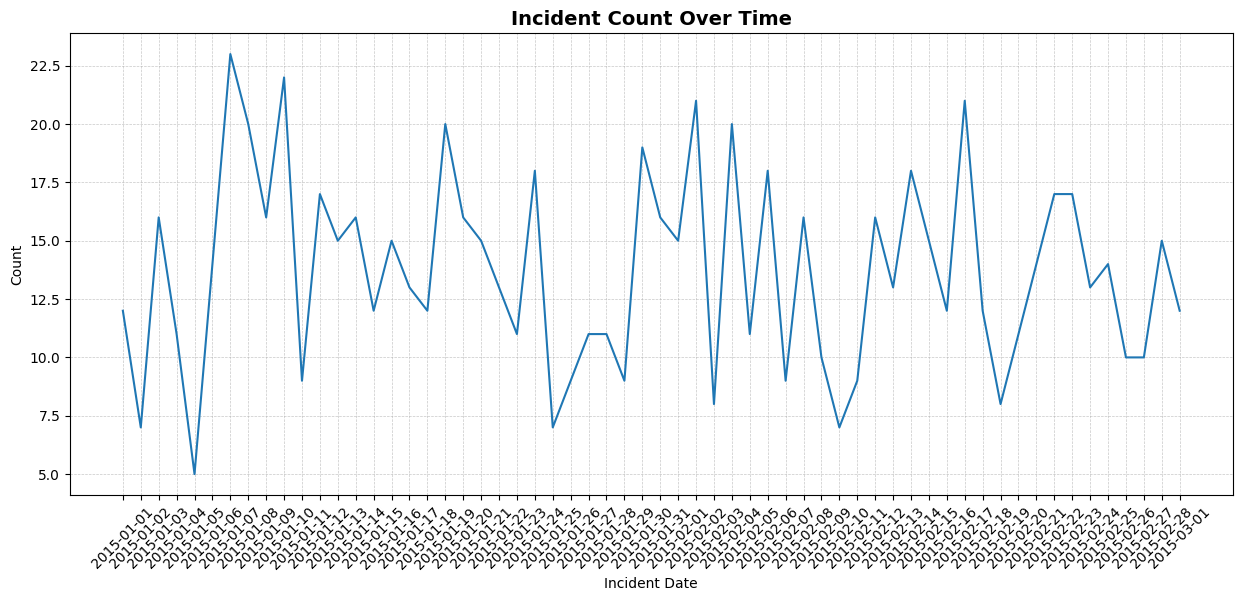

In [13]:
# Incident Count by Dates
date_counts = df_copy["incident_date"].value_counts().sort_index()

values = date_counts.values
index = date_counts.index

plt.figure(figsize= (15,6))

sns.lineplot(
    x= index,
    y= values
)
plt.title("Incident Count Over Time", fontsize=14, fontweight='bold')

plt.xlabel("Incident Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

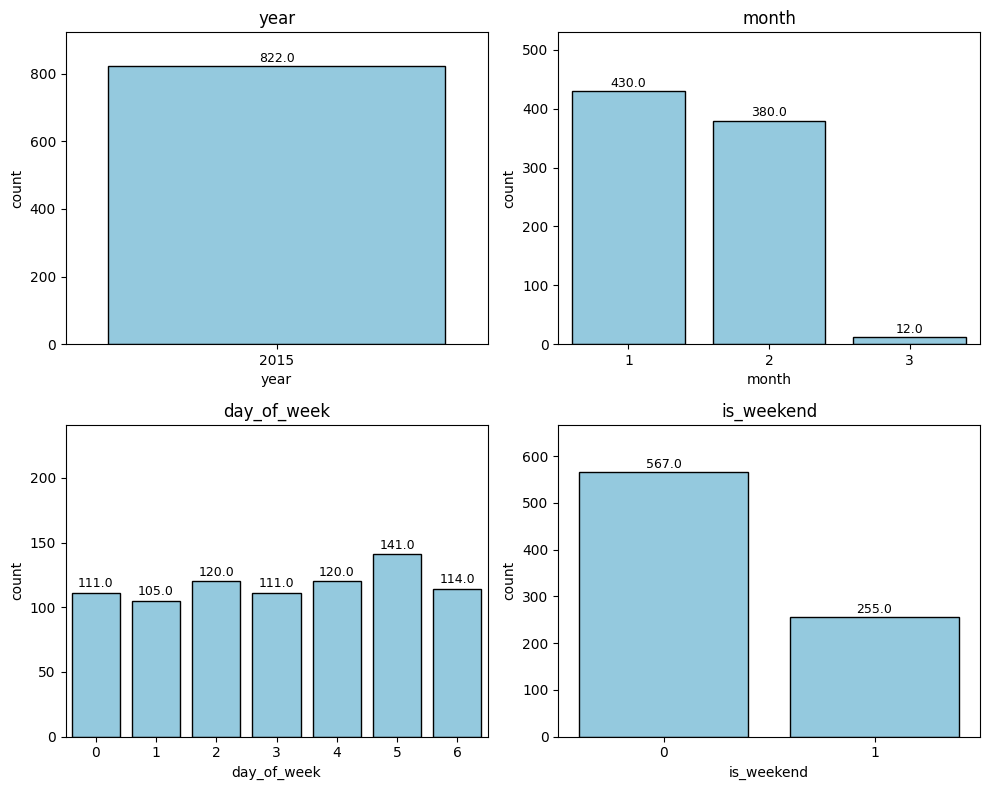

In [14]:
# Visualization of Frequency Distribution of Time Features

time_features = ["year", "month","day_of_week", "is_weekend"]
n_cols = 2
n_rows = math.ceil(len(time_features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(time_features):
    ax = axes[i]
    sns.countplot(
        data=df_copy,
        x=col,
        color='skyblue',
        edgecolor='black',
        ax=ax
    )

    counts = df_copy[col].value_counts()

    # Annotate bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height + 2),
                    ha='center', va='bottom', fontsize=9, color='black')

    ax.set_title(col)
    ax.set_ylim(0, counts.max() + 100)

    # ✅ Safe way to rotate tick labels (avoids UserWarning)
    # plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


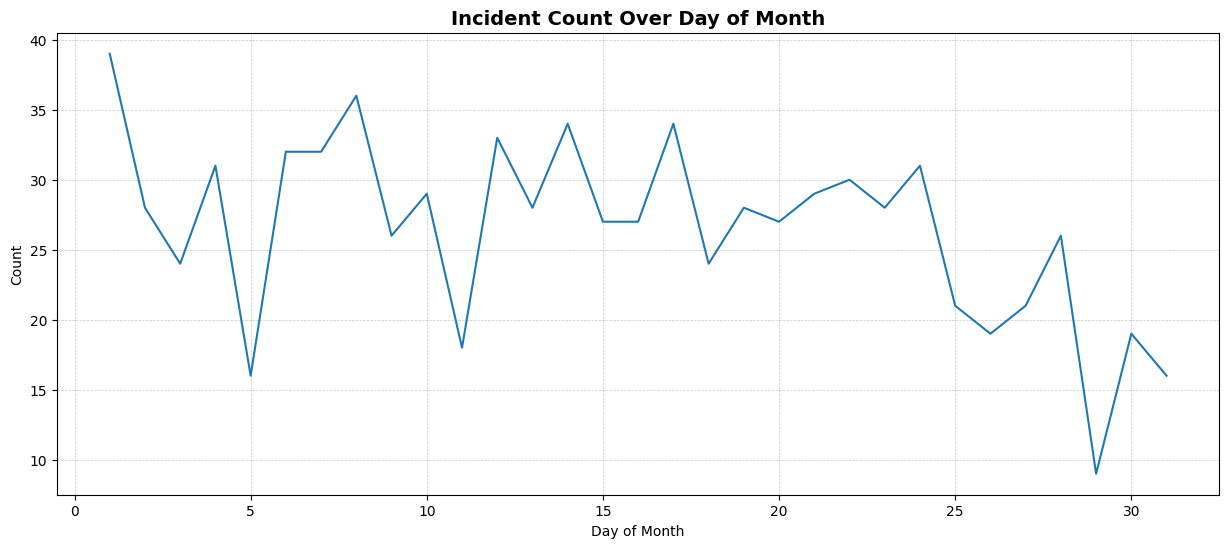

In [15]:
index= df_copy['day'].value_counts().index
values= df_copy['day'].value_counts().values

plt.figure(figsize= (15,6))

sns.lineplot(
    x= index,
    y= values
)
plt.title("Incident Count Over Day of Month", fontsize=14, fontweight='bold')

plt.xlabel("Day of Month")
plt.ylabel("Count")

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

- A slight downtrend can be observed across the month.
- Incident counts peak at the beginning of the month followed by a period of stability
- In the final 5–6 days, incident frequency drops noticeably.

# Data Cleaning

In [16]:
# Tranforming umbrella limit to absolute values
df_copy['umbrella_limit'] = df_copy['umbrella_limit'].abs()
print(df_copy['umbrella_limit'].describe().astype(int))
print("="*50)

# Handle invalid entries
df_copy = df_copy.replace("?", "NA")

row_filter = df_copy.isin(["?"]).any(axis= 1)
col_filter = df_copy.isin(["?"]).any()
print(df_copy.loc[row_filter, col_filter])
print("="*50)

# Map fraud_reported
df_copy['fraud_reported'] = df_copy['fraud_reported'].map({"Y" : 1, "N" : 0})

count         822
mean      1054744
std       2246268
min             0
25%             0
50%             0
75%             0
max      10000000
Name: umbrella_limit, dtype: int64
Empty DataFrame
Columns: []
Index: []


# Feature Engineering

In [17]:
df_selection = df_copy.copy()
df_selection.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_split,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,year,month,day,day_of_week,is_weekend
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,2015,1,25,6,1
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,2015,2,22,6,1
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NA,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,2015,1,10,5,1
3,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,1,2015,1,2,4,0
4,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,NA,0,0,NA,78650,21450,7150,50050,Nissan,Pathfinder,2012,0,2015,1,13,1,0


### Feature Selection

#### Manual

In [18]:
drop_cols = [
    'policy_number',
    'policy_bind_date',
    'insured_zip',
    'incident_location',
    'injury_claim', 
    'property_claim', 
    'vehicle_claim',
    'year',
    'incident_date'
]
df_selection = df_selection.drop(columns = drop_cols)
df_selection.head()

,months_as_customer,age,policy_state,policy_split,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,month,day,day_of_week,is_weekend
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,Saab,92x,2004,1,1,25,6,1
1,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,Dodge,RAM,2007,0,2,22,6,1
2,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NA,1,2,NO,63400,Chevrolet,Tahoe,2014,1,1,10,5,1
3,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,19,3,NO,0,2,NO,64100,Saab,95,2003,1,1,2,4,0
4,137,34,IN,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,board-games,husband,0,-77000,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,0,3,NA,0,0,NA,78650,Nissan,Pathfinder,2012,0,1,13,1,0


#### Variance Influence Factor

In [19]:
# Feature Scaling
num_cols = [
    'months_as_customer',
    'age',
    'policy_deductable',
    'policy_annual_premium',
    'umbrella_limit',
    'capital-gains',
    'capital-loss',
    'total_claim_amount'
]

from sklearn.preprocessing import MinMaxScaler
normal_scaler = MinMaxScaler()

df_selection[num_cols] = normal_scaler.fit_transform(X= df_selection[num_cols])
df_selection[num_cols].describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,total_claim_amount
count,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000
mean,0.430761,0.447634,0.424980,0.494960,0.105474,0.254315,0.756595,0.464444
std,0.243373,0.206624,0.408971,0.156954,0.224627,0.277814,0.255051,0.165195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246868,0.288889,0.000000,0.387373,0.000000,0.000000,0.527903,0.354029
50%,0.422756,0.422222,0.333333,0.496666,0.000000,0.003980,0.798830,0.456768
75%,0.582463,0.577778,1.000000,0.594000,0.000000,0.511194,1.000000,0.579395
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Computing Variance Influence Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(df):
    vif_df = pd.DataFrame({
        "features" : df.columns,
        "vif" : [variance_inflation_factor(exog= df, exog_idx= i) for i, col in enumerate(df.columns)]
    })
    return vif_df

vif_df = cal_vif(df_selection[num_cols])

high_vif_cols = vif_df[vif_df['vif'] > 10.0]['features'].to_list()

df_selection = df_selection.drop(columns= high_vif_cols)
df_selection.head()

,policy_state,policy_split,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,month,day,day_of_week,is_weekend
0,OH,250/500,0.333333,0.590075,0.0,MALE,MD,craft-repair,sleeping,husband,0.530348,1.000000,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,0.553137,Saab,92x,2004,1,1,25,6,1
1,OH,100/300,1.000000,0.594061,0.5,FEMALE,PhD,sales,board-games,own-child,0.349254,1.000000,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,0.171791,Dodge,RAM,2007,0,2,22,6,1
2,IL,250/500,1.000000,0.595725,0.6,FEMALE,PhD,armed-forces,board-games,unmarried,0.486567,0.438344,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NA,1,2,NO,0.468428,Chevrolet,Tahoe,2014,1,1,10,5,1
3,OH,250/500,0.333333,0.554366,0.0,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0.000000,1.000000,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,19,3,NO,0,2,NO,0.475650,Saab,95,2003,1,1,2,4,0
4,IN,250/500,0.333333,0.543009,0.0,MALE,PhD,prof-specialty,board-games,husband,0.000000,0.306931,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,0,3,NA,0,0,NA,0.625774,Nissan,Pathfinder,2012,0,1,13,1,0


#### Information Value

In [21]:
cat_cols = ['policy_state', 
            'policy_split', 
            'insured_sex', 
            'insured_education_level', 
            'insured_occupation', 
            'insured_hobbies', 
            'insured_relationship', 
            'incident_type',
            'collision_type',
            'incident_severity',
            'authorities_contacted',
            'incident_state',
            'incident_city',
            'incident_hour_of_the_day',
            'number_of_vehicles_involved',
            'property_damage',
            'bodily_injuries',
            'witnesses',
            'police_report_available',
            'auto_make',
            'auto_model',
            'auto_year',
            'month',
            'day',
            'day_of_week',
            'is_weekend'
        ]

In [22]:
# Computing Weight of Evidence and Information Value:
def cal_iv(df, feature, target):

    grp = df.groupby(by= feature)[target].agg(func= ['size', 'sum'])

    grp = grp.rename(columns= {
        'size' : 'count',
        'sum' : 'event'
    })

    grp['nonevent'] = grp['count'] - grp['event']

    total_event = grp['event'].sum()
    total_nonevent = grp['nonevent'].sum()

    grp['event_prop'] = grp['event'] / total_event
    grp['nonevent_prop'] = grp['nonevent'] / total_nonevent

    ratio = grp['event_prop'] / grp['nonevent_prop']

    grp['woe'] = np.log(ratio)

    grp['iv'] = grp['woe'] * (grp['event_prop'] - grp['nonevent_prop'])

    total_iv = grp['iv'].sum()

    return total_iv

iv_df = pd.DataFrame({
    'features' : cat_cols,
    'iv' : [cal_iv(df_selection, col, 'fraud_reported') for col in cat_cols]
})

low_iv_cols = iv_df[iv_df['iv'] <= 0.1]['features'].to_list()

df_selection = df_selection.drop(columns= low_iv_cols)
df_selection.head()

,policy_deductable,policy_annual_premium,umbrella_limit,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,total_claim_amount,auto_model,auto_year,fraud_reported,day
0,0.333333,0.590075,0.0,craft-repair,sleeping,0.530348,1.000000,Major Damage,5,0.553137,92x,2004,1,25
1,1.000000,0.594061,0.5,sales,board-games,0.349254,1.000000,Minor Damage,7,0.171791,RAM,2007,0,22
2,1.000000,0.595725,0.6,armed-forces,board-games,0.486567,0.438344,Major Damage,5,0.468428,Tahoe,2014,1,10
3,0.333333,0.554366,0.0,tech-support,bungie-jumping,0.000000,1.000000,Major Damage,19,0.475650,95,2003,1,2
4,0.333333,0.543009,0.0,prof-specialty,board-games,0.000000,0.306931,Minor Damage,0,0.625774,Pathfinder,2012,0,13


# Final Processing

In [23]:
# Concatenate unwanted column list
drop_features = drop_cols + high_vif_cols + low_iv_cols

df_copy = df_copy.drop(columns= drop_features).copy()

input_features = df_copy.columns.to_list()

df_copy.head()

,policy_deductable,policy_annual_premium,umbrella_limit,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,total_claim_amount,auto_model,auto_year,fraud_reported,day
0,1000,1406.91,0,craft-repair,sleeping,53300,0,Major Damage,5,71610,92x,2004,1,25
1,2000,1413.14,5000000,sales,board-games,35100,0,Minor Damage,7,34650,RAM,2007,0,22
2,2000,1415.74,6000000,armed-forces,board-games,48900,-62400,Major Damage,5,63400,Tahoe,2014,1,10
3,1000,1351.10,0,tech-support,bungie-jumping,0,0,Major Damage,19,64100,95,2003,1,2
4,1000,1333.35,0,prof-specialty,board-games,0,-77000,Minor Damage,0,78650,Pathfinder,2012,0,13


In [24]:
# Feature encoding
nominal_cols = [
    'insured_occupation',
    'insured_hobbies',
    'auto_model'
]
df_copy = pd.get_dummies(df_copy, columns= nominal_cols, dtype= "int64", drop_first= True)

df_copy['incident_severity'] = df_copy['incident_severity'].map({
                                    'Minor Damage': 0,
                                    'Major Damage': 1,
                                    'Total Loss': 2
                                })

auto_year_map = {year : i for i, year in enumerate(np.array(sorted(df_copy['auto_year'].unique())).tolist())}
auto_year_map

df_copy['auto_year'] = df_copy['auto_year'].map(auto_year_map)

# Feature scaling
col_to_scale = df_copy.drop(columns= ['fraud_reported']).columns.tolist()
df_copy[col_to_scale]= normal_scaler.fit_transform(df_copy[col_to_scale])

df_copy.head()

,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,total_claim_amount,auto_year,fraud_reported,day,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,0.333333,0.590075,0.0,0.530348,1.000000,0.5,0.217391,0.553137,0.45,1,0.800000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.594061,0.5,0.349254,1.000000,0.0,0.304348,0.171791,0.60,0,0.700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.595725,0.6,0.486567,0.438344,0.5,0.217391,0.468428,0.95,1,0.300000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.333333,0.554366,0.0,0.000000,1.000000,0.5,0.826087,0.475650,0.40,1,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.543009,0.0,0.000000,0.306931,0.0,0.000000,0.625774,0.85,0,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Export

In [ ]:
df_copy.to_csv(
    'data/processed/insurance_claims_processed_mode_two.csv',
    index= False
)

import joblib 

scaler_obj = {
    'normal_scaler' : normal_scaler,
    'input_features' : input_features,
    'cols_to_scale' : col_to_scale,
    'processed_features': df_copy.drop(columns= ['fraud_reported']).columns.tolist()
}

joblib.dump(
    scaler_obj,
    'model/scaler_obj.pkl'
)

['D:/[01] SKILLS/[00] Projects/08 Fraud Claims Prediction/model/scaler_obj.pkl']